In [9]:
import sys
import numpy as np
import cv2

from tqdm import tqdm

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
def getImages(paths):
    imgLeft = cv2.imread(paths[0])
    imgRight = cv2.imread(paths[1])

    imgLeft = cv2.cvtColor(imgLeft, cv2.COLOR_BGR2GRAY)
    imgRight = cv2.cvtColor(imgRight, cv2.COLOR_BGR2GRAY)

    fig, ax = plt.subplots(1, 2, figsize = (15, 75))

    ax[0].imshow(imgLeft, cmap="gray")
    ax[0].set_title('Left Image')
    ax[1].imshow(imgRight, cmap="gray")
    ax[1].set_title('Right Image')

    return imgLeft, imgRight

In [12]:
def SAD(left, right):
    return np.sum(abs(np.subtract(left, right)))

def SSD(left, right):
    return np.sum(np.square(abs(np.subtract(left, right))))

In [13]:
def blockMatching(imgLeft, imgRight, windowSize, metric):
    imgLeft = np.asarray(imgLeft, dtype=np.float32)
    imgRight = np.asarray(imgRight, dtype=np.float32)

    rows = imgLeft.shape[0]
    columns = imgLeft.shape[1]

    matches = np.zeros((imgLeft.shape[0], imgLeft.shape[1]))
    disparity = np.zeros((imgLeft.shape[0], imgLeft.shape[1]))

    for i in tqdm(range((windowSize//2), rows-(windowSize//2))):
        for j in range((windowSize//2), columns-(windowSize//2)):
            bestMatch = sys.maxsize
            left = imgLeft[i - windowSize//2: i + windowSize//2 + 1, j - windowSize//2 : j + windowSize//2 + 1]
            for k in range ((windowSize//2) , columns - (windowSize//2)):
                if(bestMatch == 0):
                    break
                right = imgRight[i-windowSize//2 : i+windowSize//2 + 1, k - windowSize//2 : k + windowSize//2 +1]
                if metric == "SAD":
                    difference = SAD(left, right)
                elif metric == "SSD":
                    difference = SSD(left, right)

                if(difference < bestMatch):
                    bestMatch = difference
                    Kcorrespondence = k

            matches[i][j] = bestMatch
            disparity[i][j] = abs(Kcorrespondence - j)

    return matches, disparity

In [14]:
def printDisparity(imgLeft, disparityMap):
    disparityImage = disparityMap * 255 / np.max(disparityMap)

    fig, ax = plt.subplots(1, 2, figsize = (13, 10))

    ax[0].imshow(imgLeft, cmap="gray")
    ax[0].set_title('Left Image')
    ax[1].imshow(disparityImage, cmap="gray")
    ax[1].set_title('Left Image Disparity')

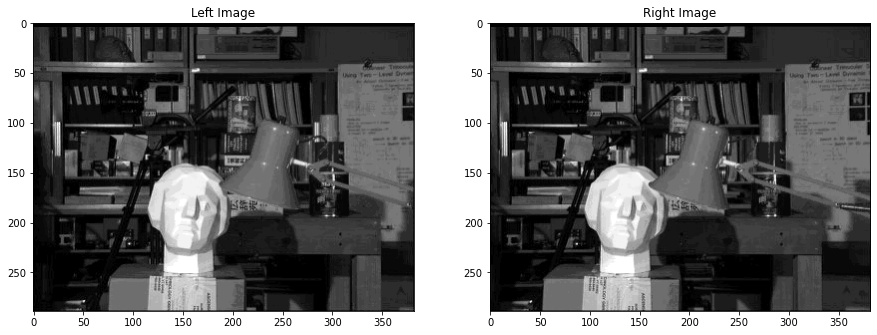

In [ ]:
paths = ["/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/l1.png", 
         "/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/r1.png"]
imgLeft, imgRight = getImages(paths)

100%|██████████| 289/289 [01:56<00:00,  2.48it/s]


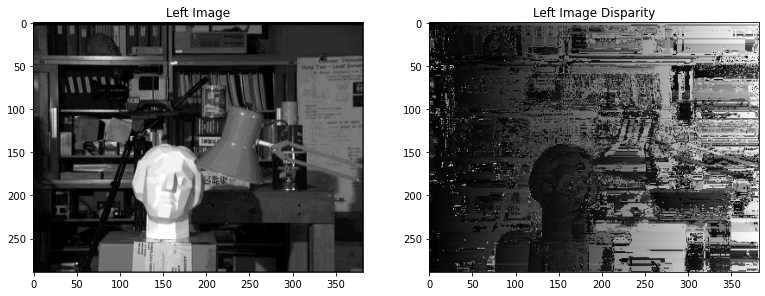

In [ ]:
matches, disparity = blockMatching(imgLeft, imgRight, 1, "SAD")
printDisparity(imgLeft, disparity)

100%|██████████| 285/285 [07:32<00:00,  1.59s/it]


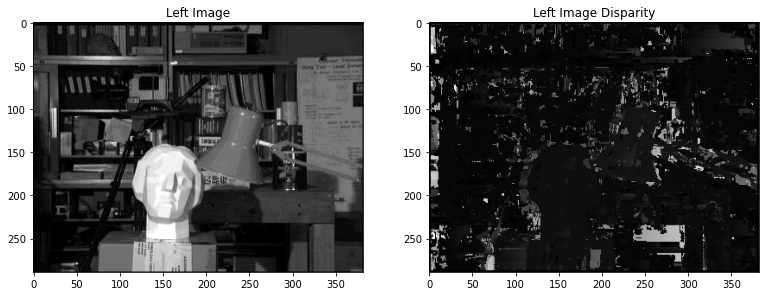

In [ ]:
matches, disparity = blockMatching(imgLeft, imgRight, 5, "SAD")
printDisparity(imgLeft, disparity)

100%|██████████| 281/281 [07:28<00:00,  1.60s/it]


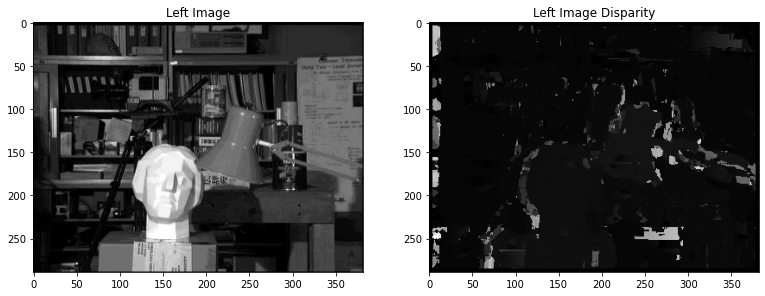

In [ ]:
matches, disparity = blockMatching(imgLeft, imgRight, 9, "SAD")
printDisparity(imgLeft, disparity)

100%|██████████| 289/289 [02:13<00:00,  2.16it/s]


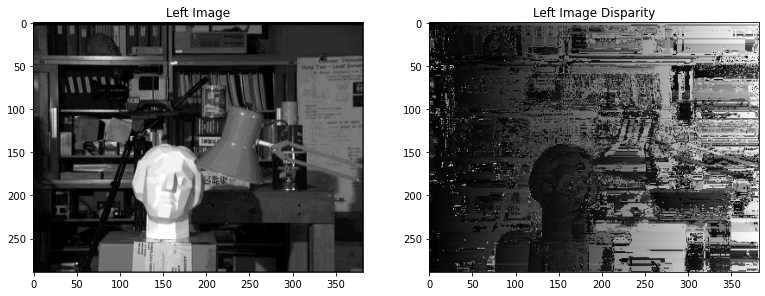

In [ ]:
matches, disparity = blockMatching(imgLeft, imgRight, 1, "SSD")
printDisparity(imgLeft, disparity)

100%|██████████| 285/285 [08:17<00:00,  1.75s/it]


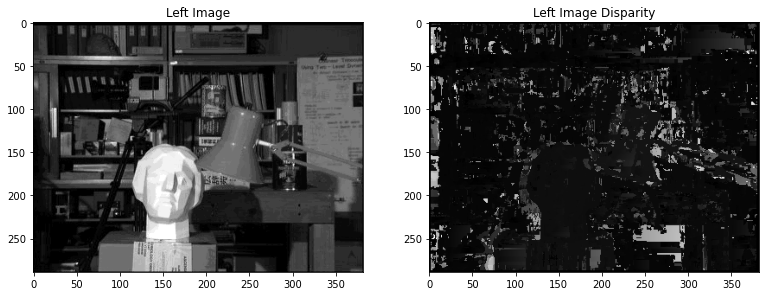

In [ ]:
matches, disparity = blockMatching(imgLeft, imgRight, 5, "SSD")
printDisparity(imgLeft, disparity)

100%|██████████| 281/281 [07:30<00:00,  1.60s/it]


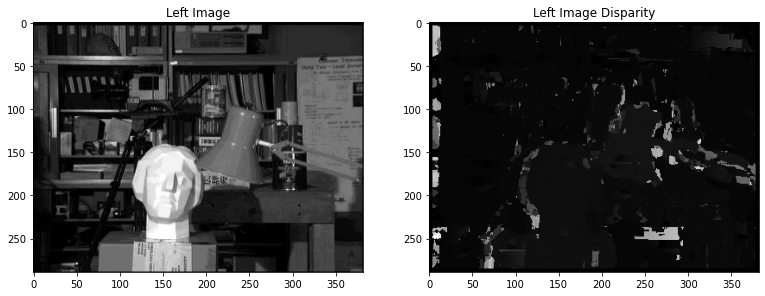

In [ ]:
matches, disparity = blockMatching(imgLeft, imgRight, 9, "SAD")
printDisparity(imgLeft, disparity)

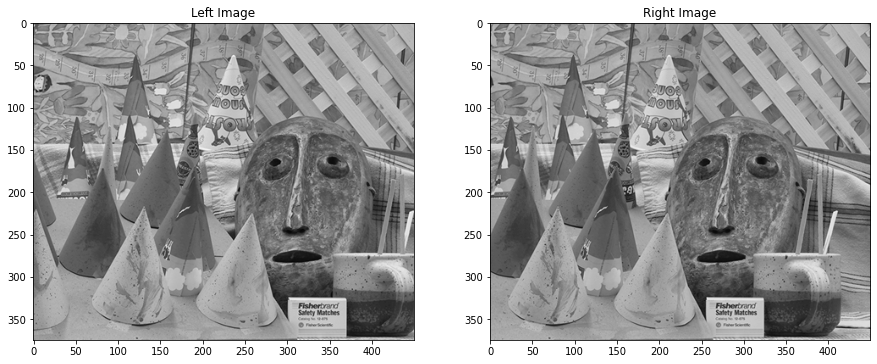

In [7]:
paths = ["/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/l2.png", 
         "/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/r2.png"]
imgLeft, imgRight = getImages(paths)

In [ ]:
matches, disparity = blockMatching(imgLeft, imgRight, 1, "SSD")
printDisparity(imgLeft, disparity)

 61%|██████    | 229/375 [02:42<01:43,  1.41it/s]

100%|██████████| 371/371 [15:45<00:00,  2.55s/it]


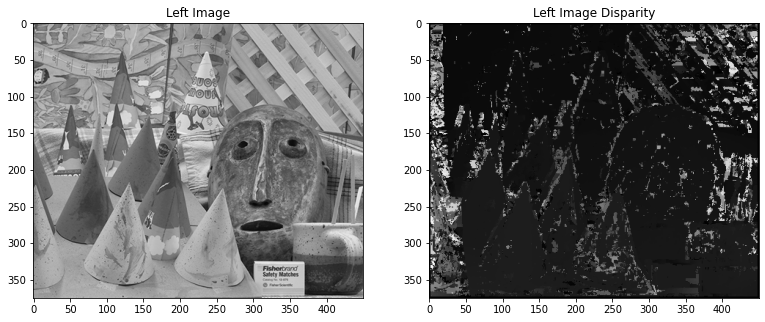

In [8]:
matches, disparity = blockMatching(imgLeft, imgRight, 5, "SSD")
printDisparity(imgLeft, disparity)